In [ ]:
# BA1A

def count(text, pattern):
  t_len = len(text)
  p_len = len(pattern)
  if(t_len < p_len):
    return 0
  return sum([1 if pattern == text[i:i+p_len] else 0 for i in range(t_len-p_len+1)])

text = 'GCGCG'
pattern = 'GCG'
count(text, pattern)

2

In [ ]:
# BA1B
from collections import Counter
def frequent_kmer(dna, k):
  kmers = Counter([dna[i:i+k] for i in range(len(dna) - k + 1)]).most_common()
  return [kmer[0] for kmer in kmers if kmers[0][1] == kmer[1]]

dna = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k = 4
kmers = frequent_kmer(dna, k)
ans = ' '.join([str(kmer) for kmer in kmers])
print(ans)

GCAT CATG


In [ ]:
# BA1C

def complement(dna):
  map = {'A':'T', 'T':'A', 'G':'C', 'C':'G'}
  return ''.join([map[p] for p in dna])

def reverse_complement(dna):
  return complement(dna)[::-1]

dna = 'AAAACCCGGT'
reverse_complement(dna)

'ACCGGGTTTT'

In [ ]:
# BA1D

def occurances(dna, pattern):
  d_len = len(dna)
  p_len = len(pattern)
  return [i for i in range(d_len - p_len + 1) if dna[i:i+p_len] == pattern]

pattern = 'ATAT'
dna = 'GATATATGCATATACTT'
occurances(dna, pattern)


[1, 3, 9]

In [ ]:
# BA1E
from collections import Counter
def clumps(dna, k, L, t):
  res = []
  for i in range(len(dna) - L + 1):
    clump_str = dna[i:i+L]
    possible_clumps_kmer = Counter([clump_str[i:i+k] for i in range(len(clump_str) - k + 1)]).most_common()
    kmers = [kmer[0] for kmer in possible_clumps_kmer if kmer[1] >= t]
    res.extend(kmers)
  return set(res)

dna = 'CGGACTCGACAGATGTGAAGAAATGTGAAGACTGAGTGAAGAGAAGAGGAAACACGACACGACATTGCGACATAATGTACGAATGTAATGTGCCTATGGC'
k, L, t = 5, 75, 4

# dna = 'TGTGGTGTGCGTGTGAGGGGG'
# k, L, t = 3, 12, 3
clumps(dna, k, L, t)


{'AATGT', 'CGACA', 'GAAGA'}

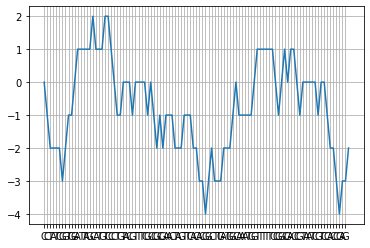

(array([53, 97]),)

In [ ]:
# BA1F
import numpy as np
import matplotlib.pyplot as plt

def skew(dna):
  map = {'A':0, 'T':0, 'G': 1, 'C': -1}
  value = np.array([0])
  value = np.append(value, [map[x] for x in dna], axis=0)
  y = np.cumsum(value)

  plt.plot(y)
  plt.xticks(range(len(dna)), dna)
  plt.grid()
  plt.show()
  return np.where(y == y.min())

dna = 'CCTATCGGTGGATTAGCATGTCCCTGTACGTTTCGCCGCGAACTAGTTCACACGGCTTGATGGCAAATGGTTTTTCCGGCGACCGTAATCGTCCACCGAG'
skew(dna)

In [ ]:
# BA1G

def hamming_distance(dna1, dna2):
  return sum([1 if dna1[i] != dna2[i] else 0 for i in range(len(dna1))])

dna1, dna2 = 'GGGCCGTTGGT', 'GGACCGTTGAC'
hamming_distance(dna1, dna2)

3

In [ ]:
# BA1H

def occurences_pattern(kmer, dna, d):
  k_len = len(kmer)
  d_len = len(dna)
  return [i for i in range(d_len - k_len + 1) if hamming_distance(kmer, dna[i:i+k_len]) <= d]

kmer = 'ATTCTGGA'
dna = 'CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAATGCCTAGCGGCTTGTGGTTTCTCCTACGCTCC'
d = 3

occurences_pattern(kmer, dna, d)

[6, 7, 26, 27, 78]

In [ ]:
# BA1I
from collections import Counter

def count(dna, kmer, d):
  return len(occurences_pattern(kmer, dna, d))

def frequent_word_with_mismatches(dna, k, d):
  kmers = set([dna[i:i+k] for i in range(len(dna) - k + 1)])
  counts = [count(dna, kmer, d) for kmer in kmers]
  mp = {k:v for k, v in zip(kmers, counts)}
  kmers_count = Counter(mp).most_common()
  return [kmer[0] for kmer in kmers_count if kmers_count[0][1] == kmer[1]]

dna = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k, d = 4, 1
frequent_word_with_mismatches(dna, k, d)

['ATGT', 'ATGC', 'GATG']

In [ ]:
# BA1J

from collections import Counter
import numpy as np

def count(dna, kmer, d):
  return len(occurences_pattern(kmer, dna, d))

def frequent_word_with_mismatches_include_reverse_complement(dna, k, d):
  kmers = set([dna[i:i+k] for i in range(len(dna) - k + 1)])
  counts = [count(dna, kmer, d) + count(dna, reverse_complement(kmer), d) for kmer in kmers]
  mp = {k:v for k, v in zip(kmers, counts)}
  kmers_count = Counter(mp).most_common()
  res = [(kmer[0], reverse_complement(kmer[0])) for kmer in kmers_count if kmers_count[0][1] == kmer[1]]
  return np.array(res).flatten()

dna = 'ACGTTGCATGTCGCATGATGCATGAGAGCT'
k, d = 4, 1
frequent_word_with_mismatches_include_reverse_complement(dna, k, d)

array(['ATGT', 'ACAT'], dtype='<U4')

In [ ]:
# BA1K

import itertools

def count_overlapping(dna, kmer):
  d_len = len(dna)
  k_len = len(kmer)
  return sum([1 if dna[i:i+k_len] == kmer else 0 for i in range(d_len-k_len + 1)])

def frequency_array(dna, k):
  kmers = [''.join(kmer) for kmer in itertools.product('ACGT', repeat=k)]
  return [count_overlapping(dna, kmer) for kmer in kmers]

dna = 'ACGCGGCTCTGAAA'
k = 2
frequency_array(dna, k)

[2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0]

In [ ]:
# BA1L

def symbolToNumber(symbol):
  mp = {'A':0, 'C':1, 'G':2, 'T':3}
  return mp[symbol]

def dnaToNumber(dna):
  if len(dna) == 0:
      return 0
  symbol = dna[-1]
  prefix = dna[:-1]
  return 4 * dnaToNumber(prefix) + symbolToNumber(symbol)

dna = 'AGT'
dnaToNumber(dna)

11

In [ ]:
# BA1M

def numberToSymbol(number):
  mp = {0:'A', 1:'C', 2: 'G', 3:'T'}
  return mp[number]

def numberToDna(number, k):
  if k == 1:
    return numberToSymbol(number)
  return numberToDna(number//4, k-1) + numberToSymbol(number % 4)

number = 45
k = 4
numberToDna(number, k)

'AGTC'

In [ ]:
# BA1N

import itertools
def dNeighborhood(dna, d):
  kmers = [''.join(kmer) for kmer in itertools.product('ACGT', repeat=len(dna))]
  return [kmer for kmer in kmers if hamming_distance(dna, kmer) <= d]

dna = 'ACG'
d = 1
dNeighborhood(dna, d)

['AAG', 'ACA', 'ACC', 'ACG', 'ACT', 'AGG', 'ATG', 'CCG', 'GCG', 'TCG']

In [ ]:
# BA2A

import itertools

def all_possible_pattern_from_kmer(kmer, d):
  kmers = [''.join(k) for k in itertools.product('ACGT', repeat=len(kmer))]
  return [k for k in kmers if hamming_distance(k, kmer) <=d]

def kmer_exist_in_dna(kmer, dna, d):
  return any(hamming_distance(kmer, dna[i:i+len(kmer)]) <= d for i in range(len(dna)-len(kmer) + 1))

def motifEnumeration(dna_list, k, d):
  kmers = {dna_list[i][j:j+k] for i in range(len(dna_list)) for j in range(len(dna_list[i])-k+1)}
  res = set()
  for kmer in kmers:
    patterns = all_possible_pattern_from_kmer(kmer, d)
    for pattern in patterns:
      if(all(kmer_exist_in_dna(pattern, dna, d) for dna in dna_list)):
        res.add(pattern)
  return res

dna_list = '''ATTTGGC
TGCCTTA
CGGTATC
GAAAATT
'''.splitlines()
k, d = 3, 1
motifEnumeration(dna_list, k, d)

{'ATA', 'ATT', 'GTT', 'TTT'}

In [ ]:
# BA2B
def distance(dna, pattern):
  return min(hamming_distance(dna[i:i+len(pattern)], pattern) for i in range(len(dna) - len(pattern) + 1))

def distanceBetweenPatternAndString(pattern, dna_list):
  return sum(distance(dna, pattern) for dna in dna_list)

def median_string(dna_list, k):
  kmers = [''.join(p) for p in itertools.product("ACGT", repeat = k)]
  min = 99999999
  kmer = None
  for kmer in kmers:
    d = sum(distance(dna, kmer) for dna in dna_list)
    if d < min:
      min = d
      motif = kmer
  return kmer

dna_list = '''AAATTGACGCAT
GACGACCACGTT
CGTCAGCGCCTG
GCTGAGCACCGG
AGTACGGGACAG
'''.splitlines()
k = 3
median_string(dna_list, k)

ACG
GAC
2


'TTT'

In [ ]:
# BA2C

def probability(kmer, profile):
  map = {'A':0, 'C':1, 'G':2, 'T':3}
  return np.prod([profile[map[n]][i] for i, n in enumerate(kmer)])

def profile_most_probability_kmer(dna, k, profile):
  kmers = [dna[i:i+k] for i in range(len(dna) - k + 1)]
  return max([(probability(kmer, profile), kmer) for kmer in kmers])[1]

k = 5
seq = 'ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT'
profile = [[0.2, 0.2, 0.3, 0.2, 0.3],[0.4, 0.3, 0.1, 0.5, 0.1], [0.3, 0.3, 0.5, 0.2, 0.4], [0.1, 0.2, 0.1, 0.1, 0.2]]
profile_most_probability_kmer(seq, k, profile)

'CCGAG'

In [ ]:
# BA2F
import random

def randomMotifs(dna_list, k, t):
  motifs = []
  for dna in dna_list:
    index = random.randint(0, len(dna) - k)
    motifs.append(dna[index:index+k])
  return motifs

def get_profile(motifs, k):
  profile = []
  for i in range(k):
    for j in range(len(motifs)):
      if j == 0:
        profile.append({'A':1, 'C':1, 'G':1, 'T':1})
      profile[i][motifs[j][i]] += 1
  return profile


def randomMotifSearch(dna_list, k, t):
  motifs = randomMotifs(dna_list, k, t)
  best_motifs = list(motifs)

  print(motifs)
  profile = get_profile(motifs, k)
  print(profile)


k, t = 8, 5
dna_list = '''CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA
GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG
TAGTACCGAGACCGAAAGAAGTATACAGGCGT
TAGATCAAGTTTCAGGTGCACGTCGGTGAACC
AATCCACCAGCTCCACGTGCAATGTTGGCCTA
'''.splitlines()

randomMotifSearch(dna_list, k, t)


['AGTAAACG', 'CCAAGGTG', 'GAGACCGA', 'GATCAAGT', 'ACCAGCTC']
[{'A': 3, 'C': 2, 'G': 3, 'T': 1}, {'A': 3, 'C': 3, 'G': 2, 'T': 1}, {'A': 2, 'C': 2, 'G': 2, 'T': 3}, {'A': 5, 'C': 2, 'G': 1, 'T': 1}, {'A': 3, 'C': 2, 'G': 3, 'T': 1}, {'A': 3, 'C': 3, 'G': 2, 'T': 1}, {'A': 1, 'C': 2, 'G': 3, 'T': 3}, {'A': 2, 'C': 2, 'G': 3, 'T': 2}]


In [ ]:
# BA2H

def distance(dna, pattern):
  return min(hamming_distance(dna[i:i+len(pattern)], pattern) for i in range(len(dna) - len(pattern) + 1))

def distanceBetweenPatternAndString(pattern, dna_list):
  return sum(distance(dna, pattern) for dna in dna_list)

pattern = 'AAA'
dna_list = '''TTACCTTAAC
GATATCTGTC
ACGGCGTTCG
CCCTAAAGAG
CGTCAGAGGT
'''.splitlines()

distanceBetweenPatternAndString(pattern, dna_list)



5

In [ ]:
# BA3A

def kmerComposition(dna, k):
  kmers = [dna[i:i+k] for i in range(len(dna) - k + 1)]
  kmers.sort()
  return kmers

k = 5
dna = 'CAATCCAAC'
kmerComposition(dna, k)

['AATCC', 'ATCCA', 'CAATC', 'CCAAC', 'TCCAA']

In [ ]:
# BA3B

def reconstructString(dna_list):
  return ''.join([dna if i == 0 else dna[-1] for i, dna in enumerate(dna_list)])

dna_list = '''ACCGA
CCGAA
CGAAG
GAAGC
AAGCT
'''.splitlines()

reconstructString(dna_list)


'ACCGAAGCT'

In [ ]:
a = 'AABBCC'
a[:-1]

'AABBC'

In [ ]:
# BA3C

def constructOverlapGraph(dna_list):
  for dna in dna_list:
    for dna1 in dna_list:
      if dna[1:] == dna1[:-1]:
        print('->'.join([dna, dna1]))

dna_list = '''ATGCG
GCATG
CATGC
AGGCA
GGCAT
'''.splitlines()

constructOverlapGraph(dna_list)

GCATG->CATGC
CATGC->ATGCG
AGGCA->GGCAT
GGCAT->GCATG


In [ ]:
# BA3D

def construct_de_bruijn_graph(kmers):
  graph = {}
  for kmer in kmers:
    prefix = kmer[:-1]
    suffix = kmer[1:]
    if prefix not in graph:
      graph[prefix] = []
    graph[prefix].append(suffix)
  keys = graph.keys()
  for key in sorted(keys):
    adj = ','.join(sorted(graph[key]))
    print('{0} -> {1}'.format(key, adj))

k = 4
dna = 'AAGATTCTCTAC'
construct_de_bruijn_graph(kmerComposition(dna, k))


AAG -> AGA
AGA -> GAT
ATT -> TTC
CTA -> TAC
CTC -> TCT
GAT -> ATT
TCT -> CTA,CTC
TTC -> TCT


In [ ]:
# BA3E

def construct_de_bruijn_graph(kmers):
  graph = {}
  for kmer in kmers:
    prefix = kmer[:-1]
    suffix = kmer[1:]
    if prefix not in graph:
      graph[prefix] = []
    graph[prefix].append(suffix)
  keys = graph.keys()
  for key in sorted(keys):
    adj = ','.join(sorted(graph[key]))
    print('{0} -> {1}'.format(key, adj))


kmers = '''GAGG
CAGG
GGGG
GGGA
CAGG
AGGG
GGAG
'''.splitlines()
construct_de_bruijn_graph(kmers)


AGG -> GGG
CAG -> AGG,AGG
GAG -> AGG
GGA -> GAG
GGG -> GGA,GGG


In [ ]:
# BA4A

table = ''' UUU F      CUU L      AUU I      GUU V
            UUC F      CUC L      AUC I      GUC V
            UUA L      CUA L      AUA I      GUA V
            UUG L      CUG L      AUG M      GUG V
            UCU S      CCU P      ACU T      GCU A
            UCC S      CCC P      ACC T      GCC A
            UCA S      CCA P      ACA T      GCA A
            UCG S      CCG P      ACG T      GCG A
            UAU Y      CAU H      AAU N      GAU D
            UAC Y      CAC H      AAC N      GAC D
            UAA Stop   CAA Q      AAA K      GAA E
            UAG Stop   CAG Q      AAG K      GAG E
            UGU C      CGU R      AGU S      GGU G
            UGC C      CGC R      AGC S      GGC G
            UGA Stop   CGA R      AGA R      GGA G
            UGG W      CGG R      AGG R      GGG G'''.split()

codon_table = dict(zip(table[0::2],table[1::2]))
stop_codons = ['UAA', 'UAG', 'UGA']

def rnaToAminoAcid(rna):
  k = 3
  subs = [rna[i:i+k]for i in range(0, len(rna) - k + 1, k)]
  res = []
  for sub in subs:
    if sub in stop_codons:
      break
    res.append(codon_table[sub])
  return ''.join(res)



rna = 'AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA'
rnaToAminoAcid(rna)


'MAMAPRTEINSTRING'

In [ ]:
# BA4B

def dna_to_rna(dna):
  return ''.join(['U' if d == 'T' else d for d in dna])

def isExistAminoAcid(mer, amino_acid):
  rna = dna_to_rna(mer)
  return rnaToAminoAcid(rna) == amino_acid

def substring_amino_acid(dna, amino_acid):
  res = []
  amino_acid_len = len(amino_acid) * 3
  for i in range(len(dna) - amino_acid_len + 1):
    mer = dna[i:i+amino_acid_len]
    reverse_mer = reverse_complement(mer)
    if(isExistAminoAcid(mer, amino_acid) or isExistAminoAcid(reverse_mer, amino_acid)):
      res.append(mer)
  return res


dna = 'ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA'
amino_acid = 'MA'
substring_amino_acid(dna, amino_acid)


['ATGGCC', 'GGCCAT', 'ATGGCC']

In [ ]:
# BA4C

massTable = '''
G 57
A 71
S 87
P 97
V 99
T 101
C 103
I 113
L 113
N 114
D 115
K 128
Q 128
E 129
M 131
H 137
F 147
R 156
Y 163
W 186'''.split()
massTable = dict(zip(massTable[0::2],massTable[1::2]))
for mass in massTable:
    massTable[mass] = int(massTable[mass])

def calculate_sum(peptide):
    val = 0
    for i in range(len(peptide)):
        val += massTable[peptide[i]]
    return val
def theoretical_spectrum(peptide):
    cyclic_peptide = peptide + peptide[:-1]
    res = []
    res.append(0)
    for i in range(1,len(peptide)):
      for j in range(len(peptide)):
          res.append(calculate_sum(cyclic_peptide[j:j+i]))
    res.append(calculate_sum(peptide))
    res.sort()
    return res
peptide = "LEQN"
print(theoretical_spectrum(peptide))

[0, 113, 114, 128, 129, 227, 242, 242, 257, 355, 356, 370, 371, 484]


In [ ]:
# BA4D

def total_peptide(mass):
    values = list(set(massTable.values()))
    masses = [0]*(mass+1)
    masses[0] = 1
    for i in range(mass + 1):
      for value in values:
        if i >= value:
          masses[i] += masses[i - value]
    return masses,masses[mass]
mass = 1024
masses, ans = total_peptide(mass)
print(ans)



14712706211


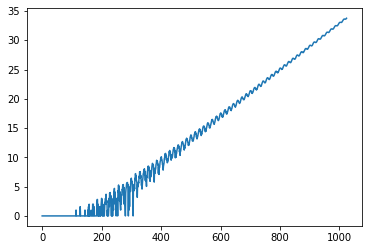

In [ ]:
axis = []
import matplotlib.pyplot as plt
import math
for i in range(mass+1):
    axis.append(i)
for i in range(len(masses)):
    if masses[i]>0:
        masses[i] = math.log2(masses[i])
plt.plot(axis,masses)
plt.show()

In [ ]:
# BA4E

import itertools
def Cyclopeptide_Sequencing_Problem(spec):
    mass = 0
    result=[]
    for i in range(1,len(spec)):
        mass += spec[i]
        result.append(spec[i])
        if mass==spec[len(spec)-1]:
            break
    result = list(itertools.permutations(result))
    return result

spec='''0 113 128 186 241 299 314 427'''.split()
spec=[eval(i) for i in spec]
Cyclopeptide_Sequencing_Problem(spec)


In [ ]:
# BA5A

def coinChange(coins, make):
  res = [0] * (make + 1)
  for i in range(1, make + 1):
    res[i] = min(res[i - coin] + 1 for coin in coins if i >= coin)
  return res[make]

make= 40
coins = [1,5,10,20,25,50]
coinChange(coins, make)

2

In [ ]:
# BA5B

import numpy as np

def longest_path(n, m, down_matrix, right_matrix):
  result = [[0] * (m+1) for i in range(n+1)]
  for i in range(1,n+1):
    result[i][0] = result[i-1][0] + down_matrix[i-1][0]

  for j in range(1,m+1):
    result[0][j] = result[0][j-1] + right_matrix[0][j-1]

  for i in range(1,n+1):
    for j in range(1,m+1):
      result[i][j] = max(result[i-1][j] + down_matrix[i-1][j], result[i][j-1] + right_matrix[i][j-1])

  return result[n][m]

n, m = 4, 4
down_str = '''
1 0 2 4 3
4 6 5 2 1
4 4 5 2 1
5 6 8 5 3
'''
right_str = '''
3 2 4 0
3 2 4 2
0 7 3 3
3 3 0 2
1 3 2 2
'''
down_matrix = np.fromstring(down_str, dtype=int, sep=' ', ).reshape(n, m + 1)
right_matrix = np.fromstring(right_str, dtype=int, sep=' ', ).reshape(n + 1, m)

print(longest_path(n, m, down_matrix, right_matrix))



34
